<a href="https://www.kaggle.com/code/capecrusader27/air-traffic-landings-eda?scriptVersionId=214308805" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('/kaggle/input/air-traffic-landings-statistics/Air_Traffic_Landings_Statistics_20241218.csv')

In [3]:
df.tail(50)

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,data_as_of,data_loaded_at
42659,202409,2024/09/01,Southwest Airlines,WN,Southwest Airlines,WN,Domestic,US,Passenger,Narrow Body,Boeing,B737,-,386,49871200,2024/11/20 02:03:53 PM,2024/11/22 03:10:45 PM
42660,202409,2024/09/01,Southwest Airlines,WN,Southwest Airlines,WN,Domestic,US,Passenger,Narrow Body,Boeing,B738,-,148,21652400,2024/11/20 02:03:53 PM,2024/11/22 03:10:45 PM
42661,202409,2024/09/01,Starlux Airlines Co. LTD,JX,Starlux Airlines Co. LTD,JX,International,Asia,Passenger,Wide Body,Airbus,A359,-,30,13690710,2024/11/20 02:03:53 PM,2024/11/22 03:10:45 PM
42662,202409,2024/09/01,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Passenger,Narrow Body,Boeing,B738,-,35,5120500,2024/11/20 02:03:53 PM,2024/11/22 03:10:45 PM
42663,202409,2024/09/01,Swiss International,LX,Swiss International,LX,International,Europe,Passenger,Wide Body,Boeing,B773,-,30,16620000,2024/11/20 02:03:53 PM,2024/11/22 03:10:45 PM
42664,202409,2024/09/01,"TACA International Airlines, S.A.",TA,"TACA International Airlines, S.A.",TA,International,Central America,Passenger,Narrow Body,Airbus,A20N,-,38,5646496,2024/11/20 02:03:53 PM,2024/11/22 03:10:45 PM
42665,202409,2024/09/01,TAP Air Portugal,TP,TAP Air Portugal,TP,International,Europe,Passenger,Wide Body,Airbus,A339,-,25,10527075,2024/11/20 02:03:53 PM,2024/11/22 03:10:45 PM
42666,202409,2024/09/01,Turkish Airlines,TK,Turkish Airlines,TK,International,Europe,Passenger,Wide Body,Airbus,A359,-,30,13690710,2024/11/20 02:03:53 PM,2024/11/22 03:10:45 PM
42667,202409,2024/09/01,Turkish Airlines,TK,Turkish Airlines,TK,International,Europe,Passenger,Wide Body,Boeing,B789,-,21,8925000,2024/11/20 02:03:53 PM,2024/11/22 03:10:45 PM
42668,202409,2024/09/01,United Airlines,UA,United Airlines,UA,Domestic,US,Passenger,Narrow Body,Airbus,A21N,-,115,20079690,2024/11/20 02:03:53 PM,2024/11/22 03:10:45 PM


In [4]:
len(df)

42709

In [5]:
df['Activity Period Start Date'].unique()

array(['1999/07/01', '1999/08/01', '1999/09/01', '1999/10/01',
       '1999/11/01', '1999/12/01', '2000/01/01', '2000/02/01',
       '2000/03/01', '2000/04/01', '2000/05/01', '2000/06/01',
       '2000/07/01', '2000/08/01', '2000/09/01', '2000/10/01',
       '2000/11/01', '2000/12/01', '2001/01/01', '2001/02/01',
       '2001/03/01', '2001/04/01', '2001/05/01', '2001/06/01',
       '2001/07/01', '2001/08/01', '2001/09/01', '2001/10/01',
       '2001/11/01', '2001/12/01', '2002/01/01', '2002/02/01',
       '2002/03/01', '2002/04/01', '2002/05/01', '2002/06/01',
       '2002/07/01', '2002/08/01', '2002/09/01', '2002/10/01',
       '2002/11/01', '2002/12/01', '2003/01/01', '2003/02/01',
       '2003/03/01', '2003/04/01', '2003/05/01', '2003/06/01',
       '2003/07/01', '2003/08/01', '2003/09/01', '2003/10/01',
       '2003/11/01', '2003/12/01', '2004/01/01', '2004/02/01',
       '2004/03/01', '2004/04/01', '2004/05/01', '2004/06/01',
       '2004/07/01', '2004/08/01', '2004/09/01', '2004/

In [6]:
# 2024/09/01

len(df[df['Activity Period Start Date'] == '2024/09/01'])

159

In [7]:
# So, we are having data from let's say 2000 to 2024

# Let's say I want to perform analysis for year 2000 first.....

df['Activity Period Start Date_datatime'] = pd.to_datetime(df['Activity Period Start Date'])

In [8]:
df_2000 = df[df['Activity Period Start Date_datatime'].dt.year == 2000]

In [9]:
df_2000

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,data_as_of,data_loaded_at,Activity Period Start Date_datatime
1005,200001,2000/01/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,NaN,56,11088000,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-01-01
1006,200001,2000/01/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,0,32,11456000,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-01-01
1007,200001,2000/01/01,ATA Airlines,TZ,ATA Airlines,TZ,International,Canada,Passenger,Wide Body,Lockheed,L1011,0,1,358000,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-01-01
1008,200001,2000/01/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,100,2,736000,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-01-01
1009,200001,2000/01/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Passenger,Wide Body,Boeing,767,NaN,7,2099965,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,200012,2000/12/01,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Wide Body,Boeing,777,NaN,188,83660000,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-12-01
2830,200012,2000/12/01,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Narrow Body,Airbus,A319,131,192,25820352,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-12-01
2831,200012,2000/12/01,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Narrow Body,Airbus,A320,232,365,51902270,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-12-01
2832,200012,2000/12/01,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Mexico,Passenger,Narrow Body,Airbus,A320,232,29,4123742,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-12-01


In [10]:
df_2000 = df_2000.dropna()

In [11]:
df_2000

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,data_as_of,data_loaded_at,Activity Period Start Date_datatime
1006,200001,2000/01/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,0,32,11456000,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-01-01
1007,200001,2000/01/01,ATA Airlines,TZ,ATA Airlines,TZ,International,Canada,Passenger,Wide Body,Lockheed,L1011,0,1,358000,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-01-01
1008,200001,2000/01/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,100,2,736000,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-01-01
1011,200001,2000/01/01,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,209,1,272000,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-01-01
1012,200001,2000/01/01,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,233,28,7728000,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,200012,2000/12/01,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Wide Body,Boeing,777,222B,91,41860000,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-12-01
2830,200012,2000/12/01,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Narrow Body,Airbus,A319,131,192,25820352,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-12-01
2831,200012,2000/12/01,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Narrow Body,Airbus,A320,232,365,51902270,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-12-01
2832,200012,2000/12/01,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Mexico,Passenger,Narrow Body,Airbus,A320,232,29,4123742,2024/11/20 02:03:51 PM,2024/11/22 03:10:45 PM,2000-12-01


In [12]:
# Questions : --

# In year 2000, which was the most used operating airline and published airlines?
# whether most of the activity were domestic or internationl??
# For Domestic/International, what kind of activity was the most common??
# For International activity, where most of the flights went??
# Which activty has the most landing count??
# Is there any relation between the aircraft body type and total landed weights??
# Is there any relation between activity type and aircraft type??

In [13]:
# First let's drop some of the non important columns to make our data clean and somewhat more esay to read for our ananlysis later on.

In [14]:
df_2000 = df_2000.drop(['Activity Period','Activity Period Start Date','Operating Airline IATA Code','Published Airline IATA Code','Aircraft Model',
                       'Aircraft Version','data_as_of','data_loaded_at'],axis=1)

In [15]:
df_2000.head()

,Operating Airline,Published Airline,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Landing Count,Total Landed Weight,Activity Period Start Date_datatime
1006,ATA Airlines,ATA Airlines,Domestic,US,Passenger,Wide Body,Lockheed,32,11456000,2000-01-01
1007,ATA Airlines,ATA Airlines,International,Canada,Passenger,Wide Body,Lockheed,1,358000,2000-01-01
1008,ATA Airlines,ATA Airlines,Domestic,US,Passenger,Wide Body,Lockheed,2,736000,2000-01-01
1011,Air Canada,Air Canada,International,Canada,Passenger,Wide Body,Boeing,1,272000,2000-01-01
1012,Air Canada,Air Canada,International,Canada,Passenger,Wide Body,Boeing,28,7728000,2000-01-01


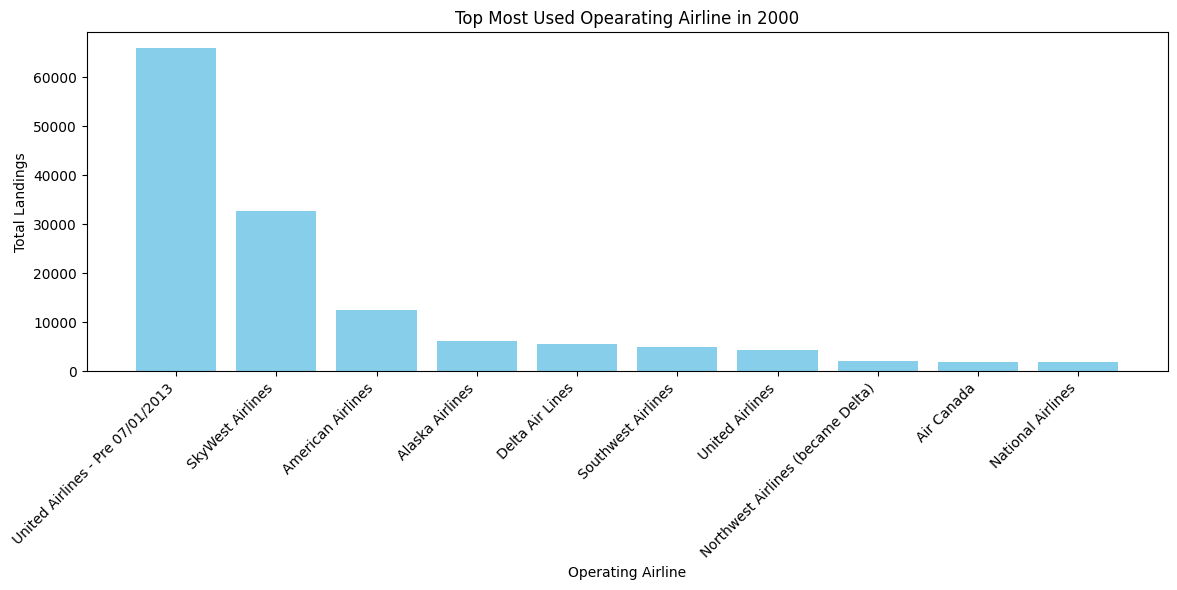

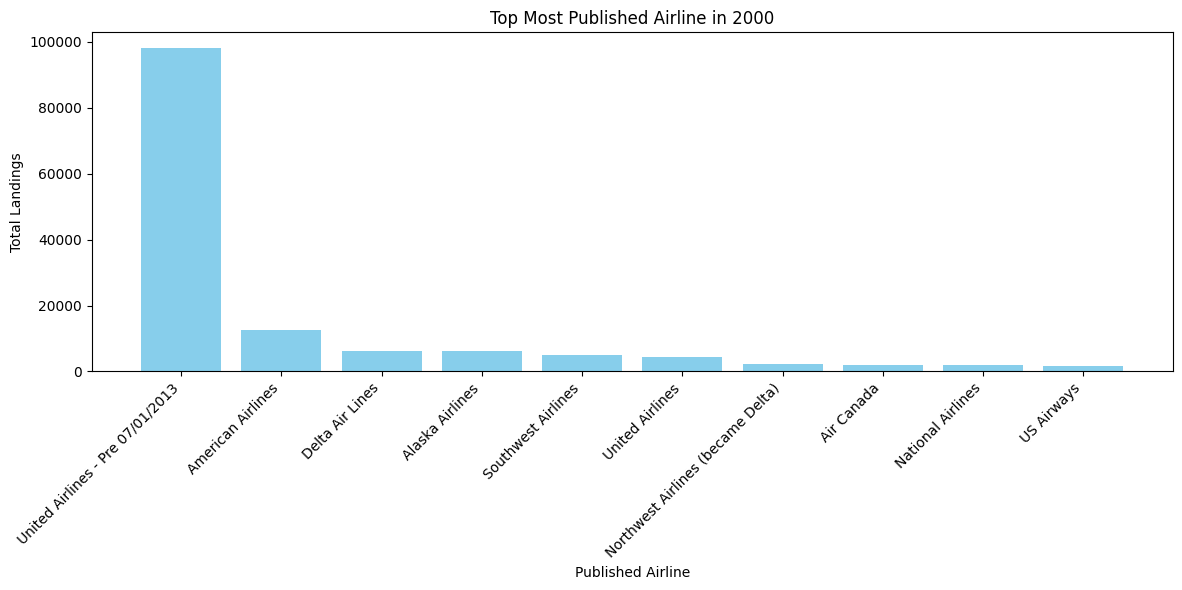

In [16]:
# Begining with our first quesiton, which most the most used operating and published airline??
operating_airline_counts = df_2000.groupby('Operating Airline')['Landing Count'].sum().sort_values(ascending=False)
pubished_airline_counts = df_2000.groupby('Published Airline')['Landing Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(operating_airline_counts.head(10).index,operating_airline_counts.head(10).values,color='skyblue')
plt.title('Top Most Used Opearating Airline in 2000')
plt.xlabel('Operating Airline')
plt.ylabel('Total Landings')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.bar(pubished_airline_counts.head(10).index,pubished_airline_counts.head(10).values,color='skyblue')
plt.title('Top Most Published Airline in 2000')
plt.xlabel('Published Airline')
plt.ylabel('Total Landings')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

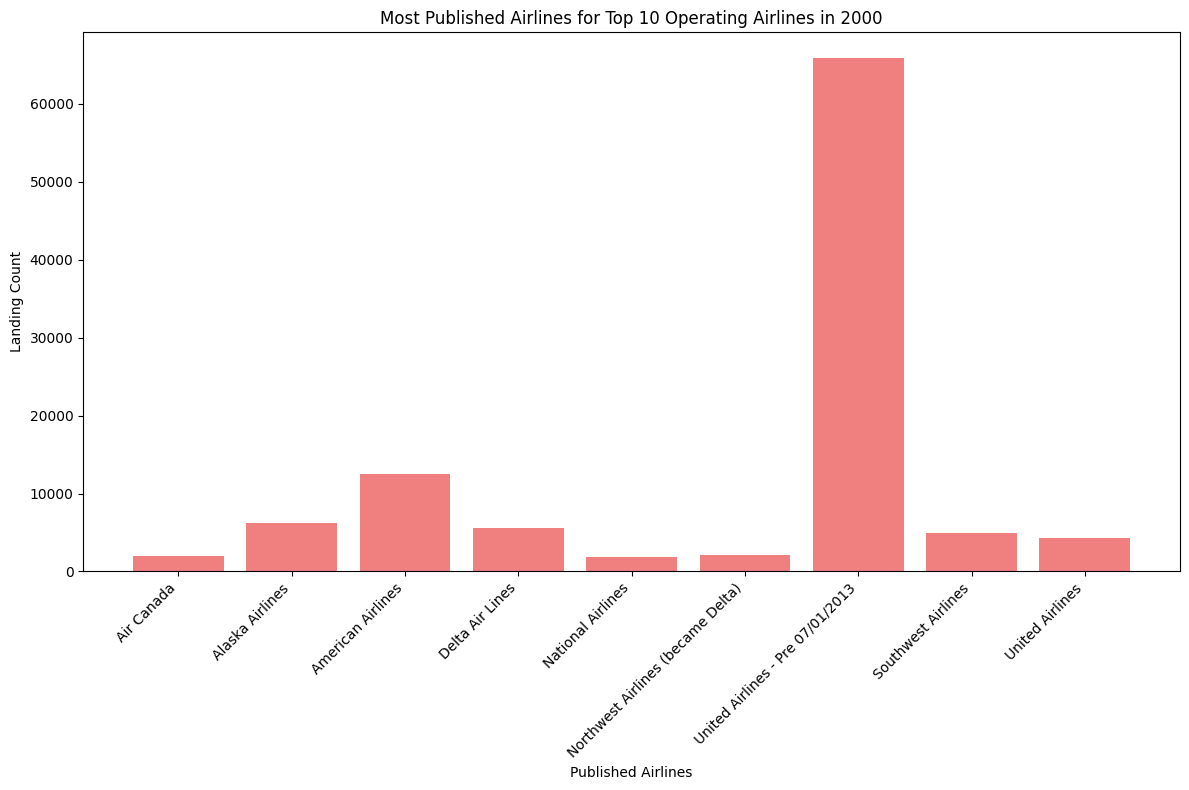

In [17]:
# Comes the second question, for most used operating airline, which airline published it the most??

# We take top 10 most operated airlines and find their published airlines

published_airline_counts = df_2000[df_2000['Operating Airline'].isin(operating_airline_counts.head(10).index)].groupby(['Operating Airline',
                                        'Published Airline'])['Landing Count'].sum().reset_index()

most_published_airlines = published_airline_counts.loc[published_airline_counts.groupby('Operating Airline')['Landing Count'].idxmax()]

plt.figure(figsize=(12,8))
plt.bar(most_published_airlines['Published Airline'], most_published_airlines['Landing Count'],color='lightcoral')
plt.title('Most Published Airlines for Top 10 Operating Airlines in 2000')
plt.xlabel('Published Airlines')
plt.ylabel('Landing Count')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()


In [18]:
# So now we have answer, that the 'United Airlines' are the most operated and published airlines.

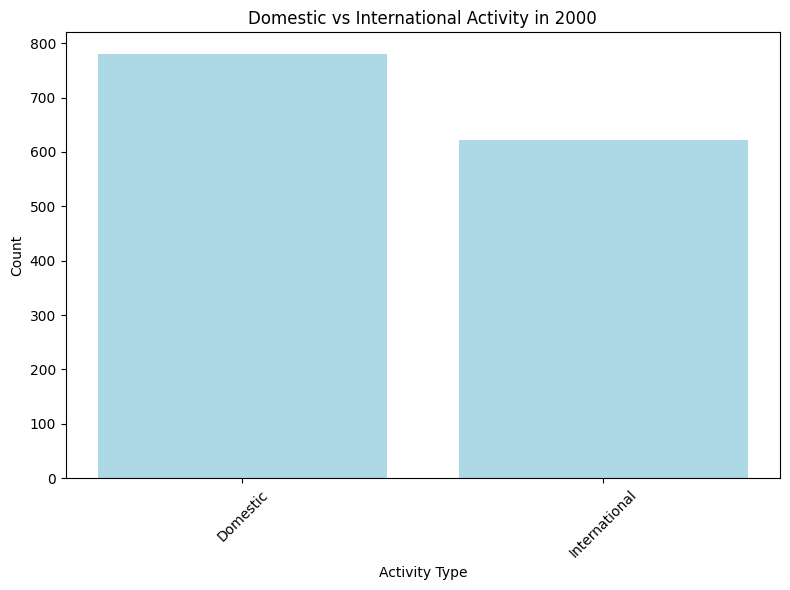

In [19]:
geo_summary_counts = df_2000['GEO Summary'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(geo_summary_counts.index,geo_summary_counts.values,color='lightblue')
plt.title('Domestic vs International Activity in 2000')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# More Domestic Flights happened in 2000 than international

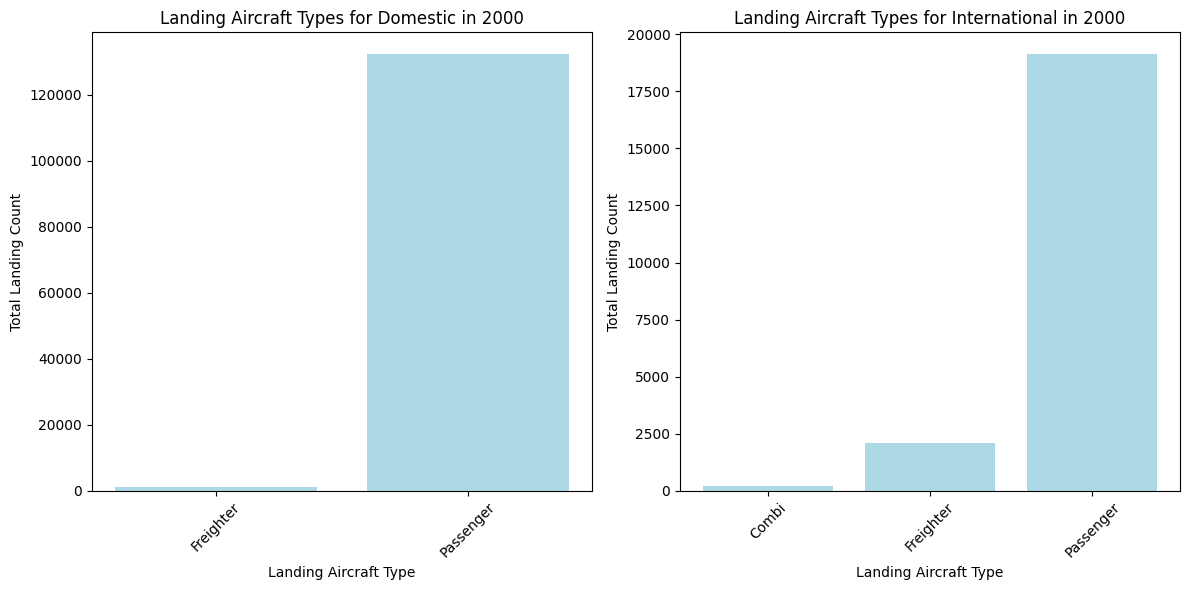

In [20]:
# For Domestic/International, what kind of activity was the most common??
# 
domestic_data = df_2000[df_2000['GEO Summary'] == 'Domestic']
international_data = df_2000[df_2000['GEO Summary'] == 'International']

domestic_aircraft_type_counts = domestic_data.groupby('Landing Aircraft Type')['Landing Count'].sum()
international_aircraft_type_counts = international_data.groupby('Landing Aircraft Type')['Landing Count'].sum()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.bar(domestic_aircraft_type_counts.index,domestic_aircraft_type_counts.values,color='lightblue')
plt.title('Landing Aircraft Types for Domestic in 2000')
plt.xlabel('Landing Aircraft Type')
plt.ylabel('Total Landing Count')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.bar(international_aircraft_type_counts.index,international_aircraft_type_counts.values,color='lightblue')
plt.title('Landing Aircraft Types for International in 2000')
plt.xlabel('Landing Aircraft Type')
plt.ylabel('Total Landing Count')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

# Majority of the aircraft type are passenger types. None of the domestic flights carries both combination of carbo as well as passengers.

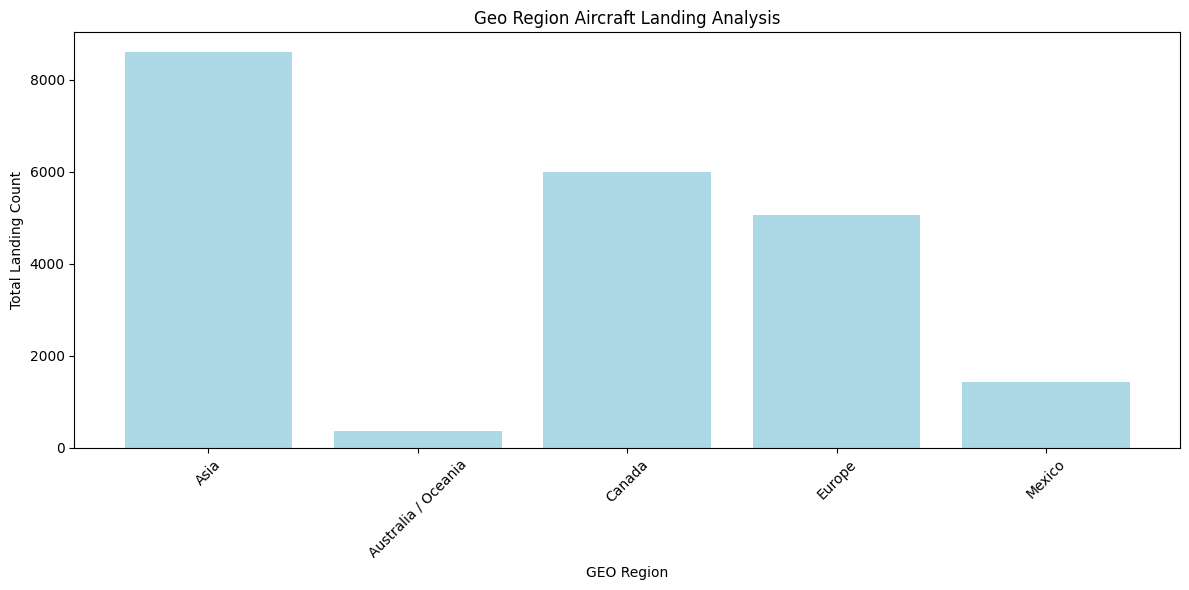

In [21]:
# For International activity, in which region most of the flights landed or arrived at SFU??

df_international_flights = df_2000[df_2000['GEO Summary'] == 'International']

df_geo_region_counts = df_international_flights.groupby('GEO Region')['Landing Count'].sum()

plt.figure(figsize=(12,6))
plt.bar(df_geo_region_counts.index,df_geo_region_counts.values,color='lightblue')
plt.title('Geo Region Aircraft Landing Analysis')
plt.xlabel('GEO Region')
plt.ylabel('Total Landing Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Majority of the international flights landed in Asia. Canda and Europe being the second most preferred destination of aircrafts, with Australia being the least.

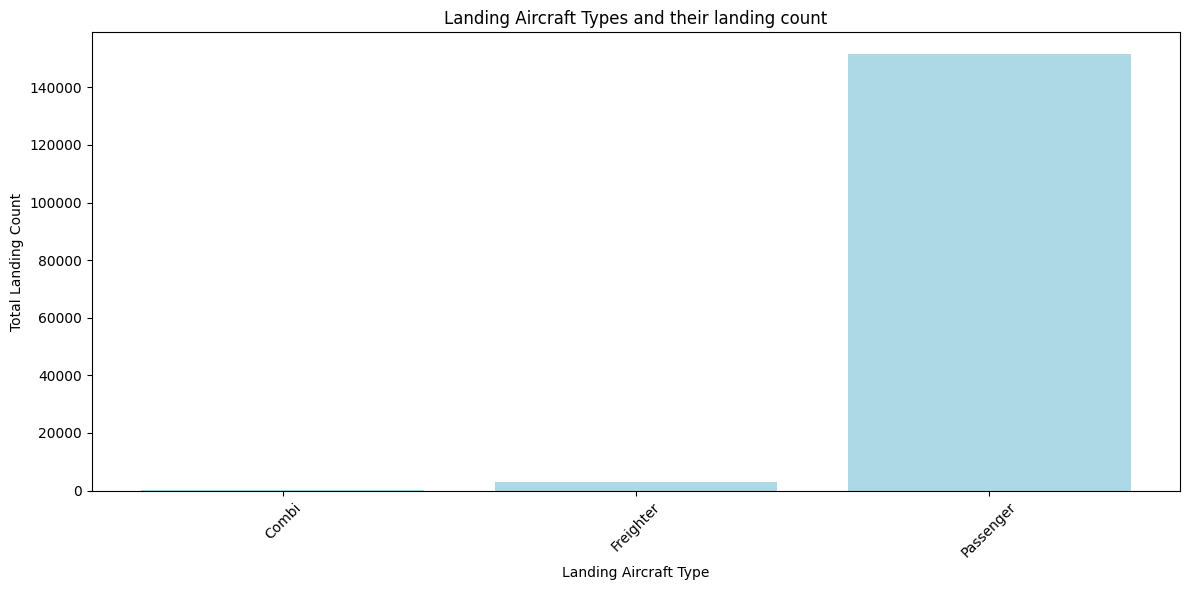

In [22]:
# Which aircraft type has the most landing count??

df_aircraft_type_counts = df_2000.groupby('Landing Aircraft Type')['Landing Count'].sum()

plt.figure(figsize=(12,6))
plt.bar(df_aircraft_type_counts.index,df_aircraft_type_counts.values,color='lightblue')
plt.title('Landing Aircraft Types and their landing count')
plt.xlabel('Landing Aircraft Type')
plt.ylabel('Total Landing Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Clearly, Passenger's Aircreaft are the most common one to land.

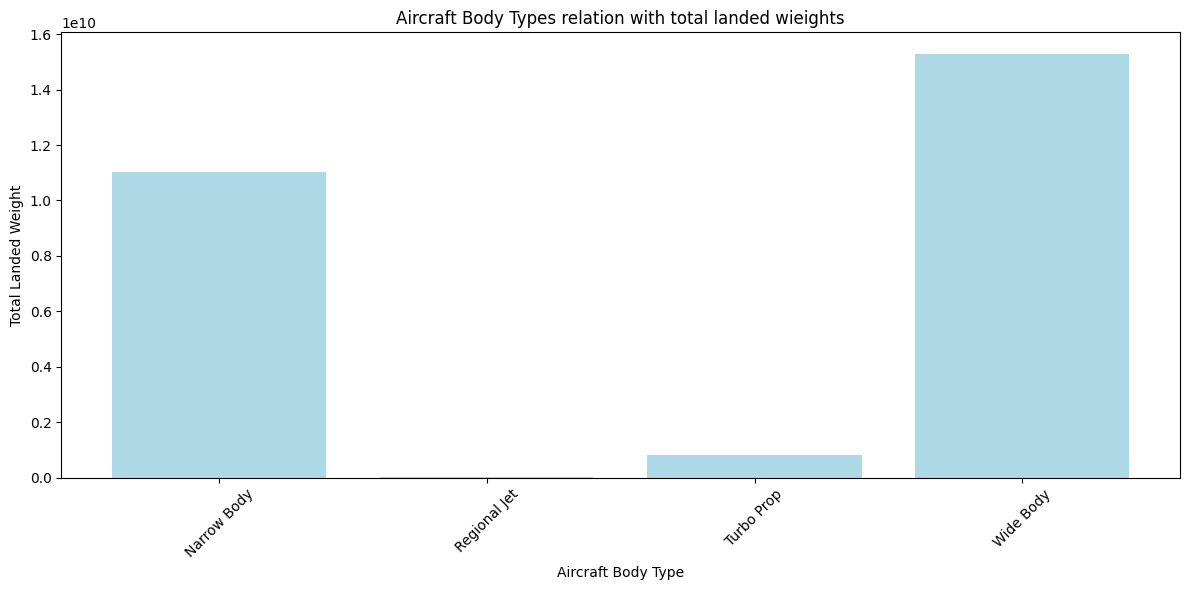

In [23]:
# Is there any relation between the aircraft body type and total landed weights??

df_aircraft_type_counts = df_2000.groupby('Aircraft Body Type')['Total Landed Weight'].sum()

plt.figure(figsize=(12,6))
plt.bar(df_aircraft_type_counts.index,df_aircraft_type_counts.values,color='lightblue')
plt.title('Aircraft Body Types relation with total landed wieights')
plt.xlabel('Aircraft Body Type')
plt.ylabel('Total Landed Weight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Wide Body and Narrow Body aircraft body type weights significantly larger than Regional Jet and Turbo Props...

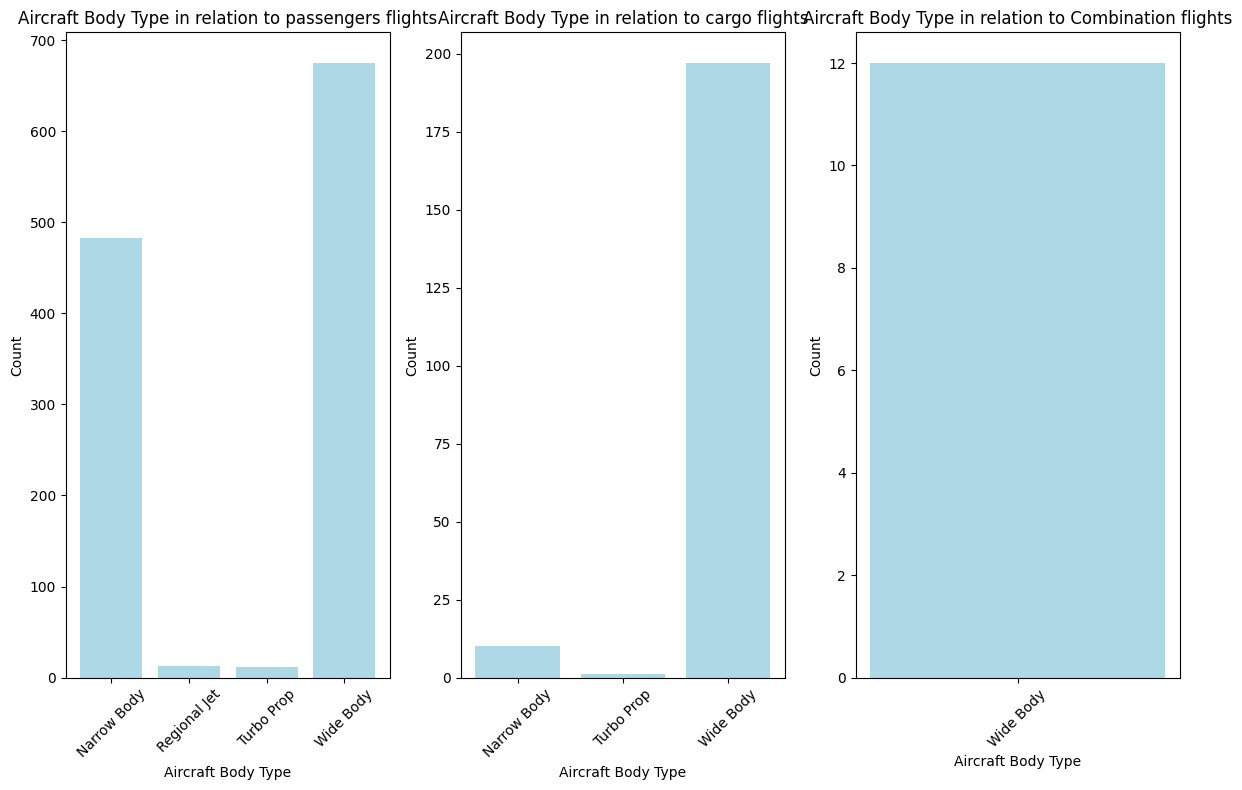

In [24]:
# Is there any relation between activity type and aircraft type??

passengers_data = df_2000[df_2000['Landing Aircraft Type'] == 'Passenger']
cargo_data = df_2000[df_2000['Landing Aircraft Type'] == 'Freighter']
combi_data = df_2000[df_2000['Landing Aircraft Type'] == 'Combi']


passengers_aircraft_type_counts = passengers_data.groupby('Aircraft Body Type')['Aircraft Body Type'].count()
cargo_aircraft_type_counts = cargo_data.groupby('Aircraft Body Type')['Aircraft Body Type'].count()
combi_aircraft_type_counts = combi_data.groupby('Aircraft Body Type')['Aircraft Body Type'].count()

plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
plt.bar(passengers_aircraft_type_counts.index,passengers_aircraft_type_counts.values,color='lightblue')
plt.title('Aircraft Body Type in relation to passengers flights')
plt.xlabel('Aircraft Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
plt.bar(cargo_aircraft_type_counts.index,cargo_aircraft_type_counts.values,color='lightblue')
plt.title('Aircraft Body Type in relation to cargo flights')
plt.xlabel('Aircraft Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
plt.bar(combi_aircraft_type_counts.index,combi_aircraft_type_counts.values,color='lightblue')
plt.title('Aircraft Body Type in relation to Combination flights')
plt.xlabel('Aircraft Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

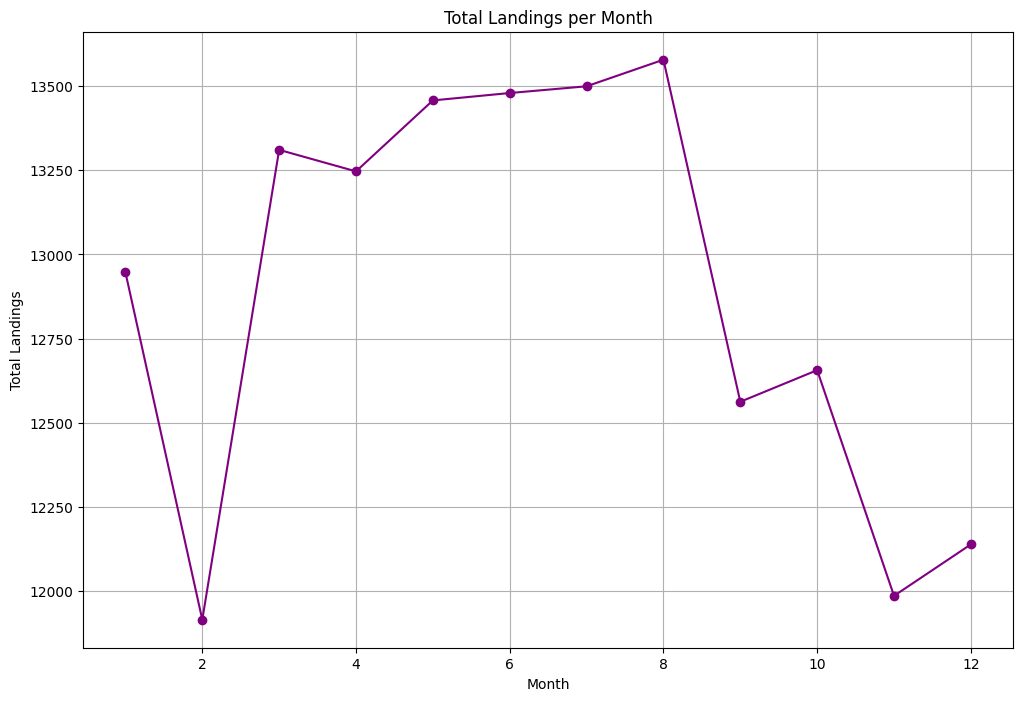

In [25]:
# Let's check out the number of total landing by month

df_2000['Month'] = df_2000['Activity Period Start Date_datatime'].dt.month
landings_per_month = df_2000.groupby('Month')['Landing Count'].sum()

plt.figure(figsize=(12,8))
plt.plot(landings_per_month.index,landings_per_month.values,marker='o',color='purple')
plt.title('Total Landings per Month')
plt.xlabel('Month')
plt.ylabel('Total Landings')
plt.grid(True)
plt.show()

In [26]:
df_2000.columns

Index(['Operating Airline', 'Published Airline', 'GEO Summary', 'GEO Region',
       'Landing Aircraft Type', 'Aircraft Body Type', 'Aircraft Manufacturer',
       'Landing Count', 'Total Landed Weight',
       'Activity Period Start Date_datatime', 'Month'],
      dtype='object')

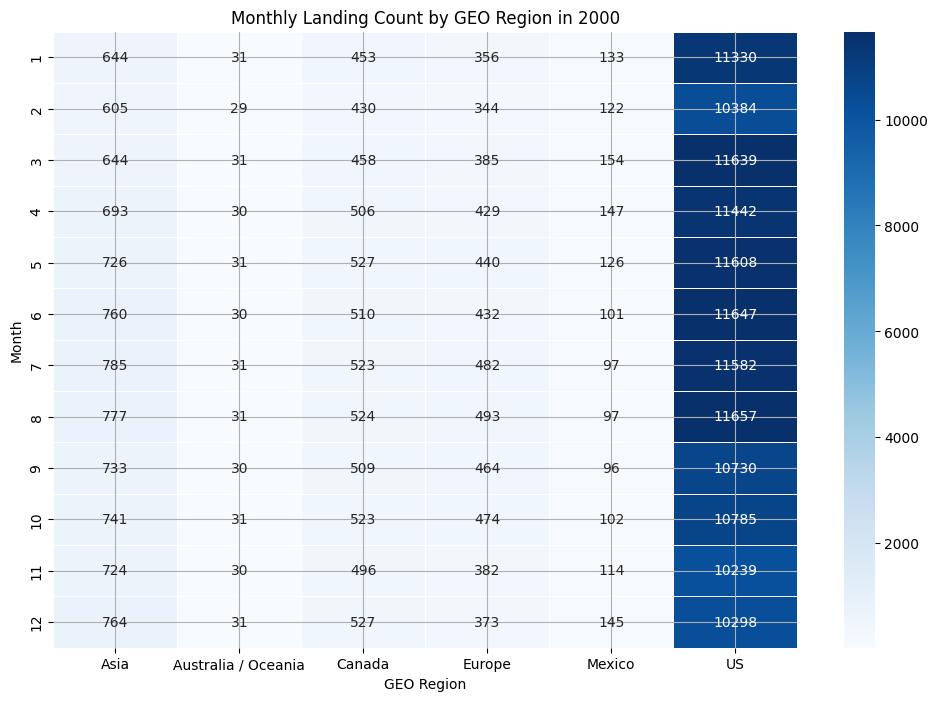

In [27]:
df_2000['Year'] = df_2000['Activity Period Start Date_datatime'].dt.year

heatmap_data = df_2000.groupby(['Month','GEO Region'])['Landing Count'].sum().unstack()

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data,annot=True,cmap='Blues',fmt='d',linewidths=0.5)
plt.title('Monthly Landing Count by GEO Region in 2000')
plt.xlabel('GEO Region')
plt.ylabel('Month')
plt.grid(True)
plt.show()

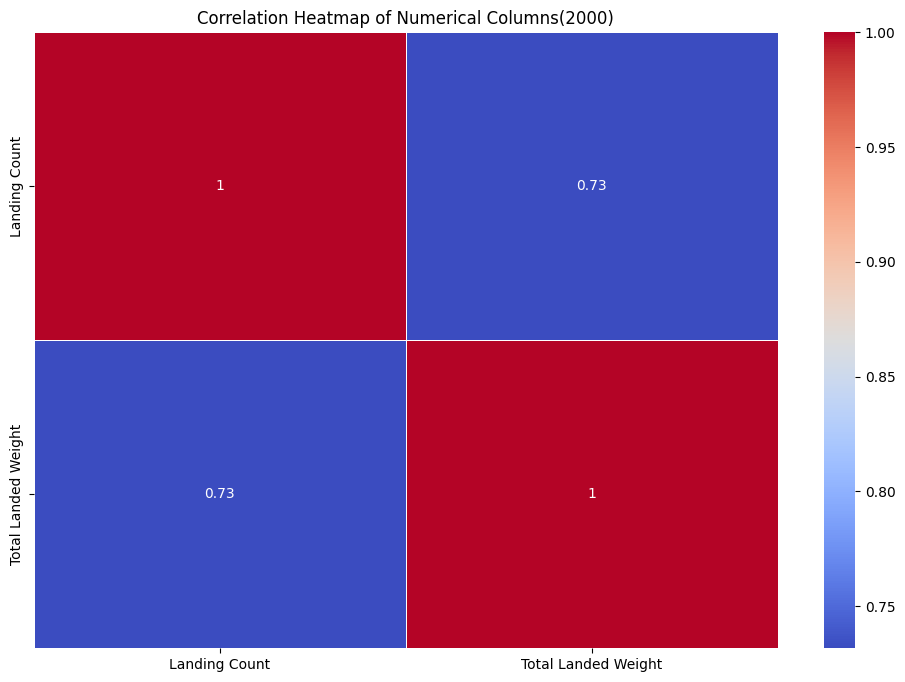

In [28]:
numerical_cols = ['Landing Count','Total Landed Weight']

correlation_matrix = df_2000[numerical_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns(2000)')
plt.show()

In [29]:
# Now, let's explore data from throughout the years.....
# Questions : --

# 1. Landing Count throughout the years.
# 2. Top Operating/Published Airlines throughout the years...
# 3. Number of domestic/International flights throughout the years.
# 4. Which aicraft type has mainly been used for respecive activties??
# 5. Check for distributions...


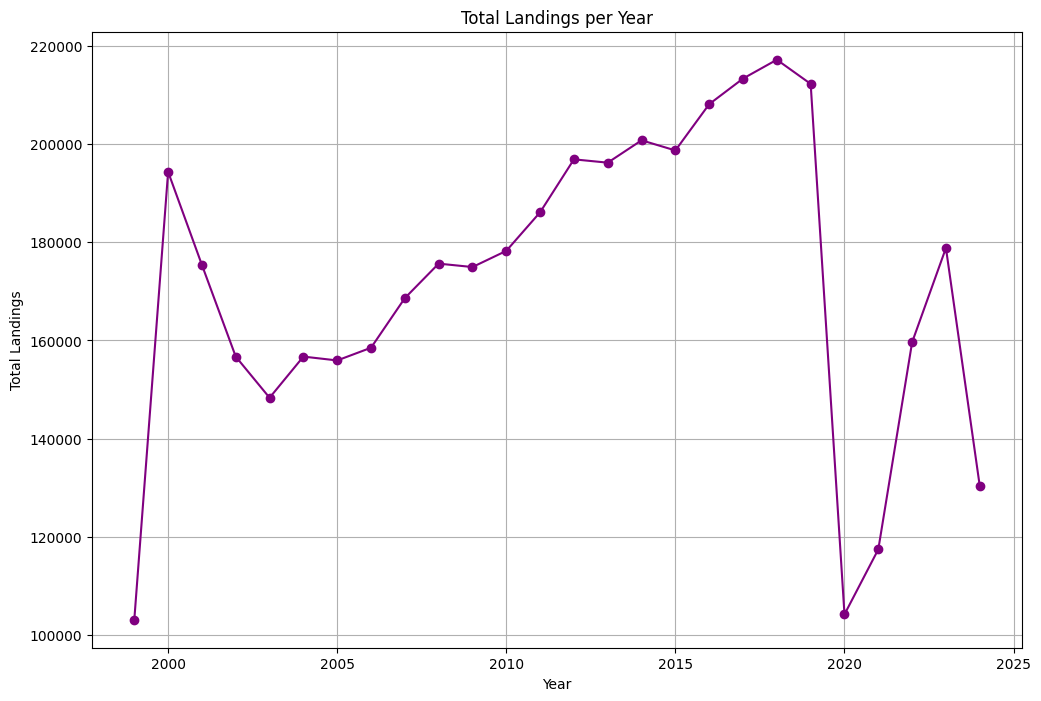

In [30]:
df.columns

df['Year'] = df['Activity Period Start Date_datatime'].dt.year

landing_count_by_year = df.groupby('Year')['Landing Count'].sum()

plt.figure(figsize=(12,8))
plt.plot(landing_count_by_year.index,landing_count_by_year.values,marker='o',color='purple')
plt.title('Total Landings per Year')
plt.xlabel('Year')
plt.ylabel('Total Landings')
plt.grid(True)
plt.show()

In [31]:
# One off the topic question for you guys, why this sudden drop of air traffic from the year 2001 to 2010??

# Talking about the stern low deep from the year 2019, we all know the reason behind it....

# Reasons that I think are 9/11, 2008 financial crisis.....
# Would love to know your thoughts on this in the comment section...

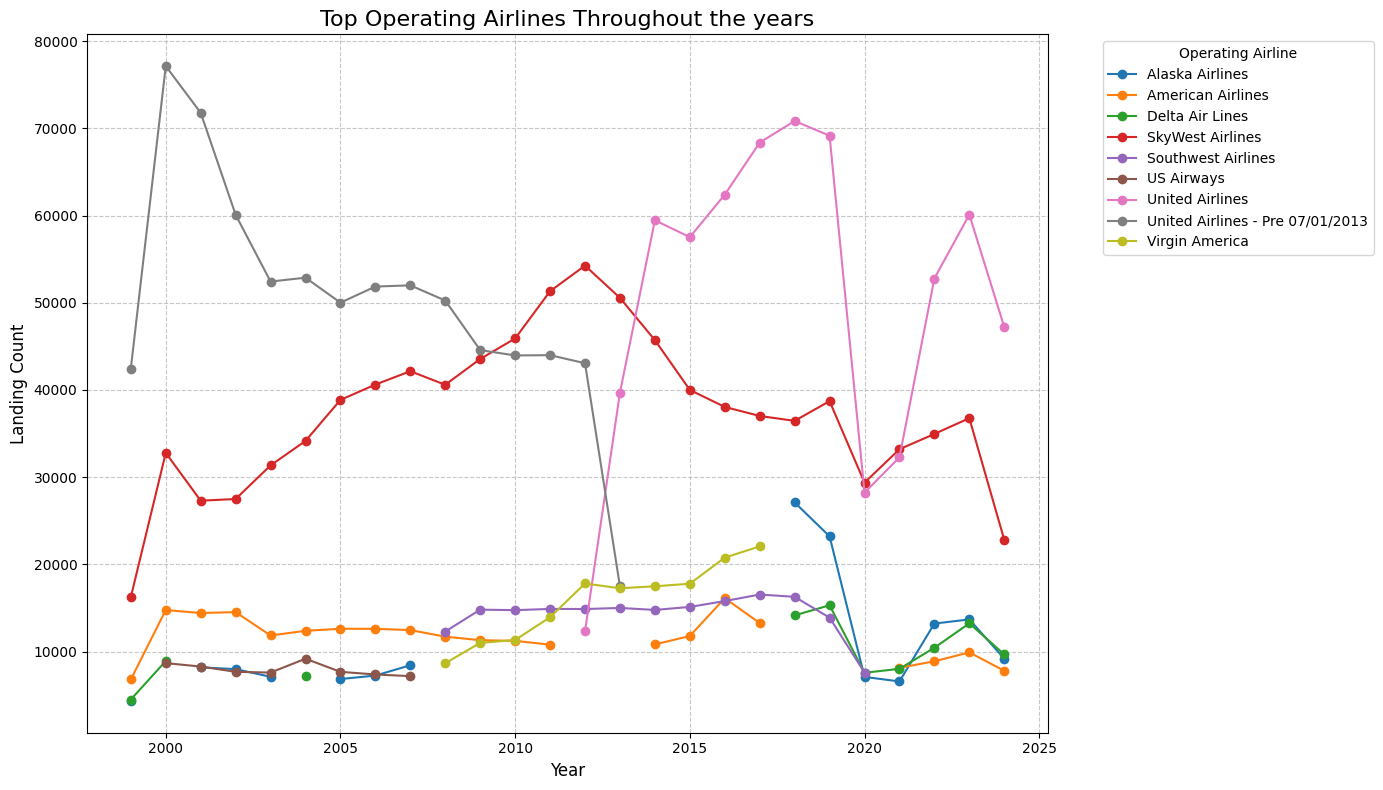

In [32]:
# Top Operating Airlines Throughout the years...

operating_airlines_by_year = df.groupby(['Year','Operating Airline'])['Landing Count'].sum().reset_index()

top_operating_airlines = (
    operating_airlines_by_year.groupby('Year',group_keys=False).apply(lambda x : x.nlargest(5,'Landing Count'))
)

pivot_data = top_operating_airlines.pivot(
    index='Year',
    columns='Operating Airline',
    values='Landing Count'
)

plt.figure(figsize=(14,8))
pivot_data.plot(kind='line',marker='o',ax=plt.gca())
plt.title('Top Operating Airlines Throughout the years',fontsize=16)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Landing Count',fontsize=12)
plt.legend(title='Operating Airline',bbox_to_anchor=(1.05,1),loc='upper left')
plt.grid(visible=True,linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

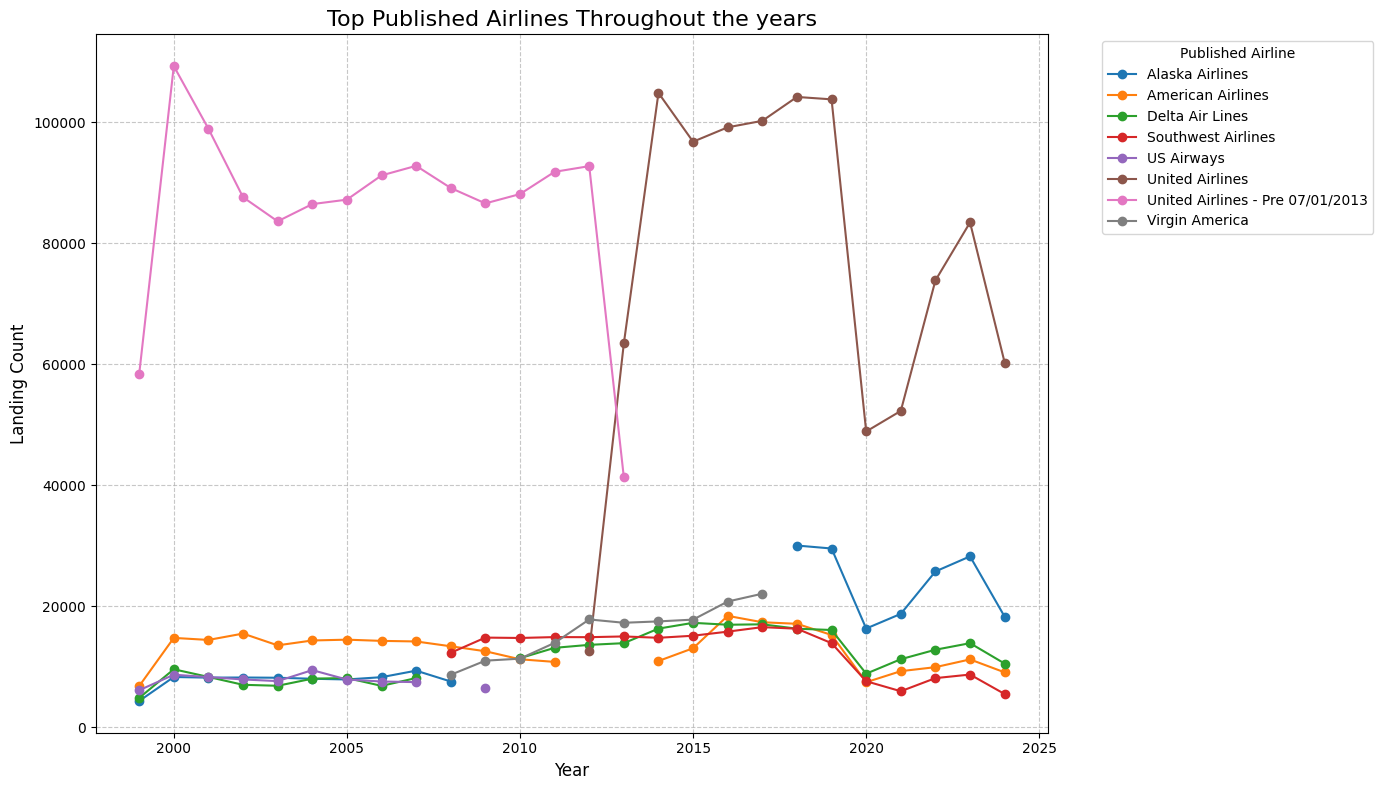

In [33]:
# Top Published Airlines Throughout the years...

published_airlines_by_year = df.groupby(['Year','Published Airline'])['Landing Count'].sum().reset_index()

top_publishing_airlines = (
    published_airlines_by_year.groupby('Year',group_keys=False).apply(lambda x : x.nlargest(5,'Landing Count'))
)

pivot_data = top_publishing_airlines.pivot(
    index='Year',
    columns='Published Airline',
    values='Landing Count'
)

plt.figure(figsize=(14,8))
pivot_data.plot(kind='line',marker='o',ax=plt.gca())
plt.title('Top Published Airlines Throughout the years',fontsize=16)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Landing Count',fontsize=12)
plt.legend(title='Published Airline',bbox_to_anchor=(1.05,1),loc='upper left')
plt.grid(visible=True,linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

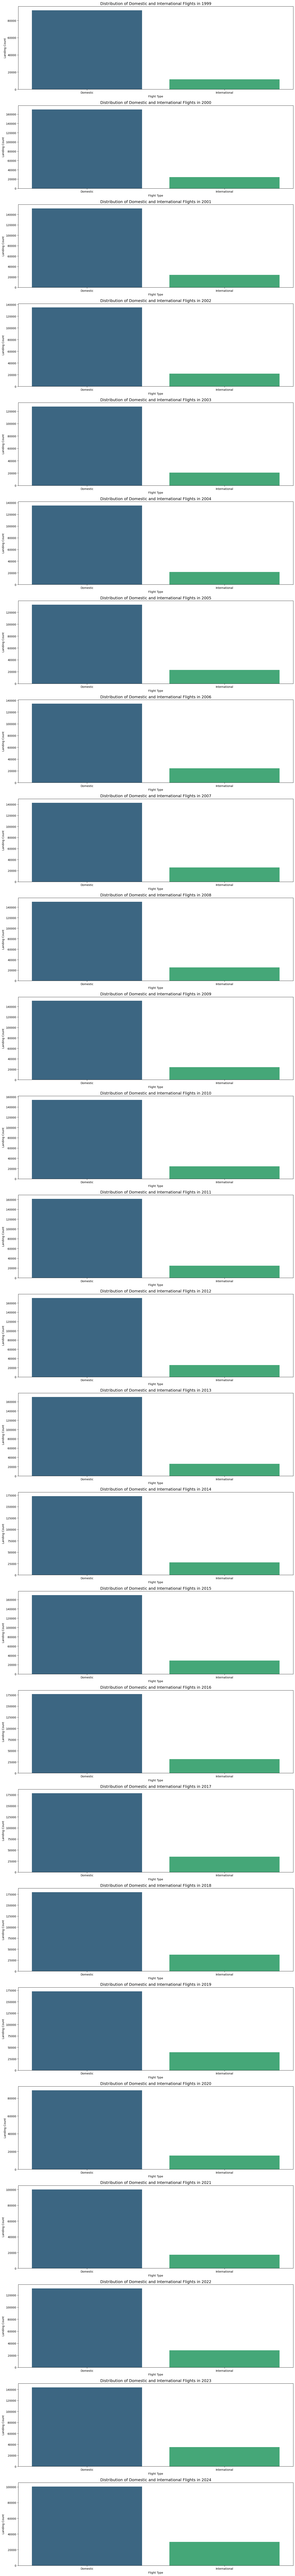

In [34]:
# Bar plot for each year showing domestic and international flight distributions....

geo_summary_by_year = df.groupby(['Year','GEO Summary'])['Landing Count'].sum().reset_index()

unique_years = sorted(geo_summary_by_year['Year'].unique())

plt.figure(figsize=(15,len(unique_years)*5))
for i, year in enumerate(unique_years,1):
    year_data = geo_summary_by_year[geo_summary_by_year['Year'] == year]
    plt.subplot(len(unique_years),1,i)
    sns.barplot(x='GEO Summary',y='Landing Count',data=year_data,palette='viridis')
    plt.title(f'Distribution of Domestic and International Flights in {year}',fontsize=14)
    plt.xlabel('Flight Type')
    plt.ylabel('Landing Count')
    plt.tight_layout()

plt.show()

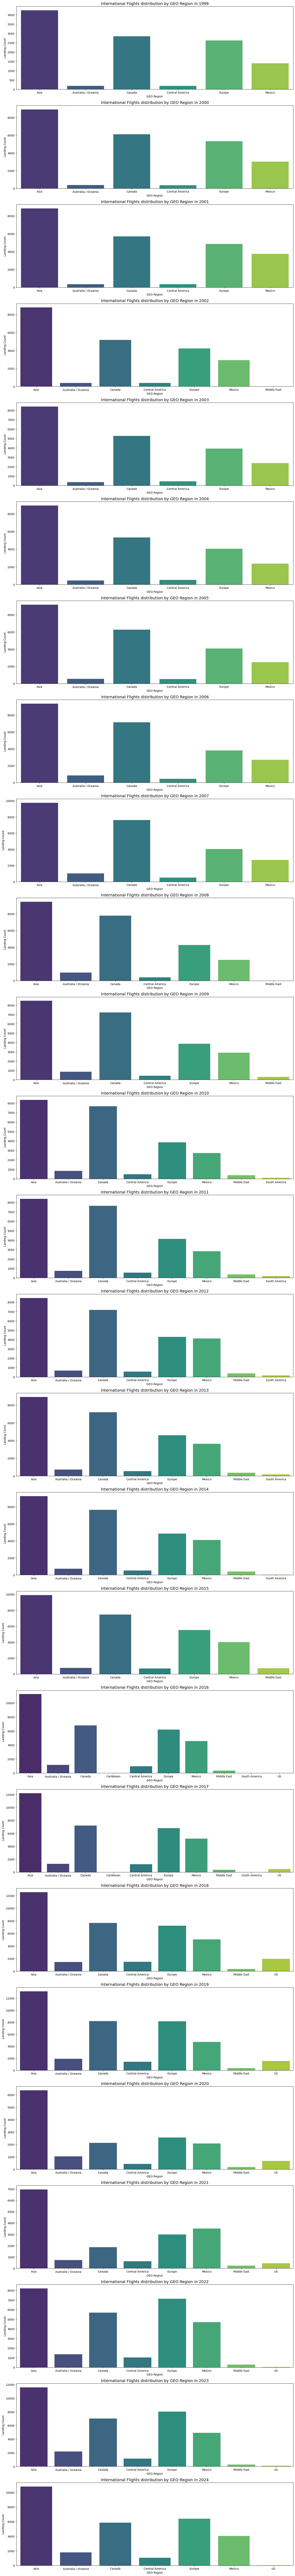

In [35]:
geo_region_by_year = df[df['GEO Summary'] == 'International'].groupby(['Year','GEO Region'])['Landing Count'].sum().reset_index()

plt.figure(figsize=(15,len(unique_years)*5))
for i, year in enumerate(unique_years,1):
    year_data = geo_region_by_year[geo_region_by_year['Year'] == year]
    plt.subplot(len(unique_years),1,i)
    sns.barplot(x='GEO Region',y='Landing Count',data=year_data,palette='viridis')
    plt.title(f'International Flights distribution by GEO Region in {year}',fontsize=14)
    plt.xlabel('GEO Region')
    plt.ylabel('Landing Count')
    plt.tight_layout()

plt.show()

In [36]:
df = pd.read_csv('/kaggle/input/air-traffic-landings-statistics/Air_Traffic_Landings_Statistics_20241218.csv')

Landing Count          5197
Total Landed Weight    4214
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

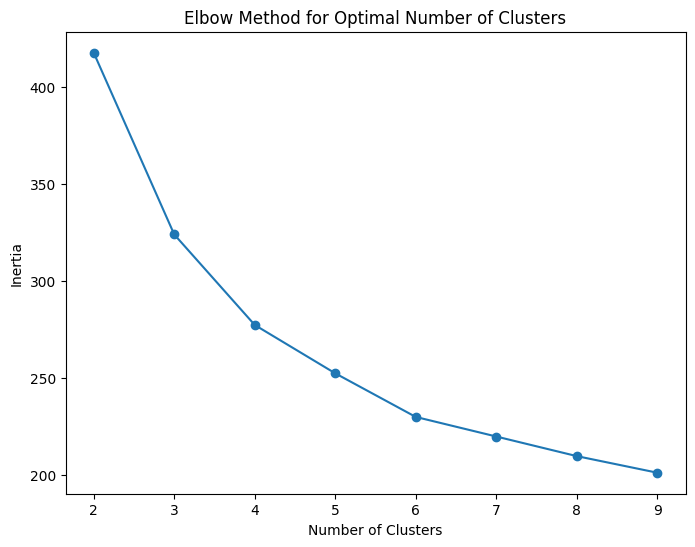

In [37]:
airline_data = df[['Operating Airline','Landing Count','Total Landed Weight','GEO Summary','GEO Region']]

# Data Grouped by Operating Airline with their landing count and total landing weight sum, and most frequent values of geo summary,geo region
# OP 1 - 1000 , 2000, domestic, Asia
# Removing Outliers
numerical_columns = ['Landing Count','Total Landed Weight']

Q1 = airline_data[numerical_columns].quantile(0.25)
Q3 = airline_data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (airline_data[numerical_columns] < lower_bound) | (airline_data[numerical_columns] > upper_bound)
print(outliers.sum())

data_cleaned = airline_data[~((airline_data[numerical_columns] < lower_bound) | (airline_data[numerical_columns] > upper_bound)).any(axis=1)]
aggregated_data = (
    data_cleaned.groupby('Operating Airline',as_index=False)
    .agg({
        'Landing Count':'sum',
        'Total Landed Weight':'sum',
        'GEO Summary':lambda x : x.mode()[0],
        'GEO Region':lambda x : x.mode()[0]
    })
)

encoded_data = pd.get_dummies(aggregated_data,columns=['GEO Summary','GEO Region','Operating Airline'],drop_first=True)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_data[['Landing Count','Total Landed Weight']])
scaled_data = pd.DataFrame(scaled_features,columns = ['Landing Count','Total Landed Weight'])

final_data = pd.concat([scaled_data,encoded_data.drop(columns=['Landing Count','Total Landed Weight'])],axis=1)

inertia = []

range_clusters = range(2,10)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(final_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range_clusters,inertia,marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


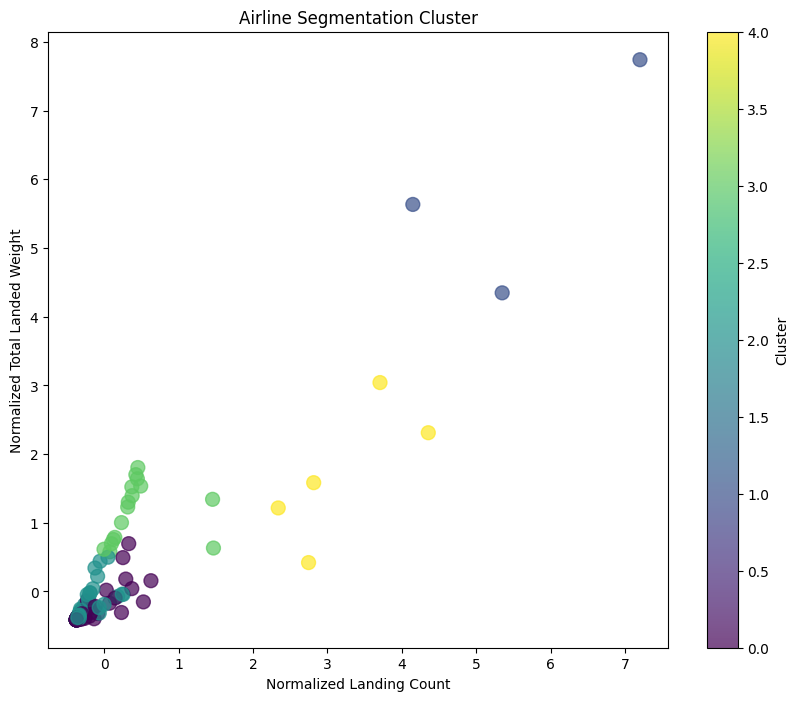

In [38]:
kmeans = KMeans(n_clusters=5,random_state=42)
clusters = kmeans.fit_predict(final_data)
aggregated_data['Cluster'] = clusters


plt.figure(figsize=(10,8))
plt.scatter(
    final_data['Landing Count'],
    final_data['Total Landed Weight'],
    c = clusters,cmap='viridis',s=100,alpha=0.7
)
plt.title('Airline Segmentation Cluster')
plt.xlabel('Normalized Landing Count')
plt.ylabel('Normalized Total Landed Weight')
plt.colorbar(label='Cluster')
plt.show()

In [39]:
for cluster in aggregated_data['Cluster'].unique():
    print(f'Cluster {cluster}:')
    print(aggregated_data[aggregated_data['Cluster'] == cluster])

Cluster 0:
            Operating Airline  Landing Count  Total Landed Weight GEO Summary  \
0                 21 Air, LLC            422            131999000    Domestic   
2                     ABX Air           8454           2145769300    Domestic   
3              ASTAR USA, LLC            142             39050000    Domestic   
4                ATA Airlines          13932           2956472100    Domestic   
5         Active Aero Charter              3              1231500    Domestic   
..                        ...            ...                  ...         ...   
158             Union Flights            108               842400    Domestic   
161  United Parcel Service CO             27              7526000    Domestic   
162         Vanguard Airlines            547             71428500    Domestic   
169             World Airways            200            125396000    Domestic   
171              Xtra Airways              1               124000    Domestic   

    GEO Region  

In [40]:
silhouette_score(final_data, clusters)

0.2534175718656768

In [41]:
aggregated_data[aggregated_data['Cluster'] == 0].describe()

,Landing Count,Total Landed Weight,Cluster
count,73.000000,7.300000e+01,73.0
mean,2773.219178,4.898389e+08,0.0
std,4891.942781,1.011969e+09,0.0
min,1.000000,9.780000e+04,0.0
25%,27.000000,4.766968e+06,0.0
50%,375.000000,6.462820e+07,0.0
75%,3110.000000,4.395021e+08,0.0
max,21026.000000,5.530620e+09,0.0


In [42]:
aggregated_data[aggregated_data['Cluster'] == 1].describe()

,Landing Count,Total Landed Weight,Cluster
count,3.000000,3.000000e+00,3.0
mean,124568.333333,3.155903e+10,1.0
std,32250.556683,8.556591e+09,0.0
min,94834.000000,2.376681e+10,1.0
25%,107426.500000,2.698057e+10,1.0
50%,120019.000000,3.019432e+10,1.0
75%,139435.500000,3.545514e+10,1.0
max,158852.000000,4.071596e+10,1.0


In [43]:
aggregated_data[aggregated_data['Cluster'] == 2].describe()

,Landing Count,Total Landed Weight,Cluster
count,76.000000,7.600000e+01,76.0
mean,1857.486842,6.145981e+08,2.0
std,3026.333291,9.902539e+08,0.0
min,1.000000,1.210000e+05,2.0
25%,114.000000,3.929000e+07,2.0
50%,537.000000,1.518236e+08,2.0
75%,2235.000000,6.652839e+08,2.0
max,13184.000000,4.545833e+09,2.0


In [44]:
aggregated_data[aggregated_data['Cluster'] == 3].describe()

,Landing Count,Total Landed Weight,Cluster
count,16.000000,1.600000e+01,16.0
mean,16760.062500,7.839666e+09,3.0
std,9067.865463,2.150056e+09,0.0
min,7797.000000,4.941872e+09,3.0
25%,10748.750000,5.752342e+09,3.0
50%,15136.000000,8.371420e+09,3.0
75%,17236.250000,9.675175e+09,3.0
max,38646.000000,1.106478e+10,3.0


In [45]:
aggregated_data[aggregated_data['Cluster'] == 4].describe()

,Landing Count,Total Landed Weight,Cluster
count,5.000000,5.000000e+00,5.0
mean,74804.400000,1.061734e+10,4.0
std,17186.695168,5.029071e+09,0.0
min,56902.000000,4.154428e+09,4.0
25%,65450.000000,8.127553e+09,4.0
50%,66894.000000,9.965262e+09,4.0
75%,85584.000000,1.359674e+10,4.0
max,99192.000000,1.724274e+10,4.0


In [46]:
aggregated_data[aggregated_data['Cluster'] == 4]

# So, looking at our cluster 4, we can make out that it tried to cluster Airline's having high values of landing count but not more 100,000.

,Operating Airline,Landing Count,Total Landed Weight,GEO Summary,GEO Region,Cluster
12,Air Canada,66894,9965261966,International,Canada,4
28,Alaska Airlines,99192,13596738168,International,US,4
35,American Airlines,85584,17242739777,Domestic,US,4
135,SkyWest Airlines,65450,4154428030,Domestic,US,4
157,US Airways,56902,8127552600,Domestic,US,4


In [47]:
aggregated_data[aggregated_data['Cluster'] == 3]

# Cluster 3 tried bringing together data whose landing count were relatively higher than those of cluster 2.
# Cluster 2 as well clustered mostly international flights but their landing count were compartively somewhat lower.

,Operating Airline,Landing Count,Total Landed Weight,GEO Summary,GEO Region,Cluster
17,Air France,10457,5827734782,International,Europe,3
32,"All Nippon Company Airways, Ltd.",9466,4941872000,International,Asia,3
39,Asiana Airlines,12722,7061658620,International,Asia,3
47,British Airways,17333,11064776587,International,Europe,3
53,Cathay Pacific,15730,9020028186,International,Asia,3
55,China Airlines,15641,9660554781,International,Asia,3
69,EVA Airways,14631,8546089728,International,Asia,3
84,Frontier Airlines,38646,5213340391,Domestic,US,3
96,Japan Airlines,14479,8196751000,International,Asia,3
103,Korean Air Lines,17204,10247089947,International,Asia,3


In [48]:
aggregated_data[aggregated_data['Cluster'] == 2]

# Cluster 2 clearly clustered International flights with less landing count compared to cluster 3.

,Operating Airline,Landing Count,Total Landed Weight,GEO Summary,GEO Region,Cluster
1,ABC Aerolineas S.A. de C.V. dba Interjet,868,124104460,International,Mexico,2
6,"Aer Lingus, Ltd.",3342,1347021780,International,Europe,2
7,Aeroflot Russian International Airlines,634,254032161,International,Europe,2
8,Aeromexico,13184,1837443000,International,Mexico,2
9,Air 2000,5,726800,International,Europe,2
...,...,...,...,...,...,...
166,Volaris Airlines,864,125668054,International,Mexico,2
167,WOW Air,626,252881296,International,Europe,2
168,WestJet,6442,876521520,International,Canada,2
170,XL Airways France,270,108017774,International,Europe,2


In [49]:
aggregated_data[aggregated_data['Cluster'] == 0]

# Cluster 0 clustered heavily the domestic flights with an inclusion of a single international flight(maybe because of less landing count of that international flight)

,Operating Airline,Landing Count,Total Landed Weight,GEO Summary,GEO Region,Cluster
0,"21 Air, LLC",422,131999000,Domestic,US,0
2,ABX Air,8454,2145769300,Domestic,US,0
3,"ASTAR USA, LLC",142,39050000,Domestic,US,0
4,ATA Airlines,13932,2956472100,Domestic,US,0
5,Active Aero Charter,3,1231500,Domestic,US,0
...,...,...,...,...,...,...
158,Union Flights,108,842400,Domestic,US,0
161,United Parcel Service CO,27,7526000,Domestic,US,0
162,Vanguard Airlines,547,71428500,Domestic,US,0
169,World Airways,200,125396000,Domestic,US,0


In [50]:
aggregated_data[aggregated_data['Cluster'] == 1]

# Cluster 1 groups flights with massive landing count(more than 100,000)

,Operating Airline,Landing Count,Total Landed Weight,GEO Summary,GEO Region,Cluster
66,Delta Air Lines,120019,23766812815,Domestic,US,1
159,United Airlines,158852,40715962725,International,US,1
160,United Airlines - Pre 07/01/2013,94834,30194323390,International,US,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GEO Summary   Domestic  International
Cluster                              
0            1573166.0       447294.0
1            2219754.0       225857.0


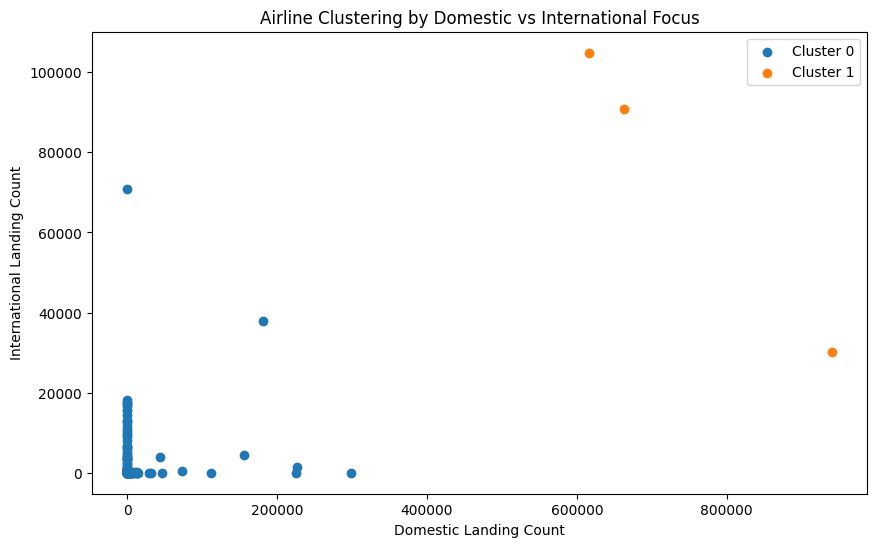

In [51]:
geo_summary_data = df.groupby(['Operating Airline','GEO Summary'])['Landing Count'].sum().reset_index()

pivoted_data = geo_summary_data.pivot(index='Operating Airline',columns='GEO Summary',values='Landing Count').fillna(0)


scaler = StandardScaler()
normalized_data = scaler.fit_transform(pivoted_data)

kmeans = KMeans(n_clusters=2,random_state=42)
pivoted_data['Cluster'] = kmeans.fit_predict(normalized_data)

print(pivoted_data.groupby('Cluster').sum())

plt.figure(figsize=(10,6))
for cluster in pivoted_data['Cluster'].unique():
    subset = pivoted_data[pivoted_data['Cluster'] == cluster]
    plt.scatter(subset['Domestic'],subset['International'],label=f"Cluster {cluster}")

plt.title('Airline Clustering by Domestic vs International Focus')
plt.xlabel('Domestic Landing Count')
plt.ylabel('International Landing Count')
plt.legend()
plt.show()